### Convergence of binomial tree price to the BSM price for European put 

Assume that the underlying price process follows Geometric Brownian motion
$$dS_t = rS_t dt + \sigma S_t dW_t$$ for some constant interest rate $r$ and volatility $\sigma>0$. To obtain a sequence of binomial approximation converging to the geometric brownian motion, we set
$$S_n^{\pm}(s) = se^{(r-0.5\sigma^2)\Delta_n \pm \sigma \sqrt{\Delta_n}}$$
$$up = e^{(r-0.5\sigma^2)\Delta_n + \sigma \sqrt{\Delta_n}}$$
$$down = e^{(r-0.5\sigma^2)\Delta_n - \sigma \sqrt{\Delta_n}}$$
$$q_n^{+} = \frac{e^{r\Delta_n} - down}{up - down} \in (0,1)$$

In [1]:
import numpy as np
import scipy.special
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def binom_valuation(s0, k, T, n_periods, sigma, r):
    """calculating the price of european put through binomial tree"""
    delta = T/n_periods
    #up and down coefficients
    up = np.exp((r-0.5*(sigma**2))*delta + sigma*np.sqrt(delta))
    down = np.exp((r-0.5*(sigma**2))*delta - sigma*np.sqrt(delta))
    #risk neutral probability of going up
    q = (np.exp(r*delta)- down)/(up - down)
    
    #setting up a final price at time T
    S_final = np.zeros(n_periods+1)
    put = np.zeros(n_periods+1)
    for i in range(0, n_periods+1):
        S_final[i] = (up**(n_periods - i))*(down**i)*s0
        put[i] = np.exp(-r*T)*np.max([k-S_final[i], 0])*(q**(n_periods-i))*((1-q)**i)*scipy.special.binom(n_periods,i)
    return np.sum(put)

In [3]:
def BSM(s0, k, T, sigma, r):
    """calculating the price of european put through the Black-Scholes formula"""
    d_plus = (1/(sigma*T))*(np.log((np.exp(r*T)*s0)/k) + 0.5*(sigma**2)*T)
    d_minus =  (1/(sigma*T))*(np.log((np.exp(r*T)*s0)/k) - 0.5*(sigma**2)*T)
    put = np.exp(-r*T)*k*norm.cdf(-d_minus) - s0*norm.cdf(-d_plus)
    return put

In [4]:
#setting up some parameters
s0=100
k=100
T = 1
sigma = 0.2
r = 0.02
max_periods = 200

#setting the vector of put prices wrt number of periods
puts_periods = np.zeros(max_periods)
for i in range(1,max_periods+1):
    puts_periods[i-1] = binom_valuation(s0, k, T, i, sigma, r)

#setting the vector of BSM prices
BSM_vector = np.ones(max_periods)*BSM(s0, k, T, sigma, r)

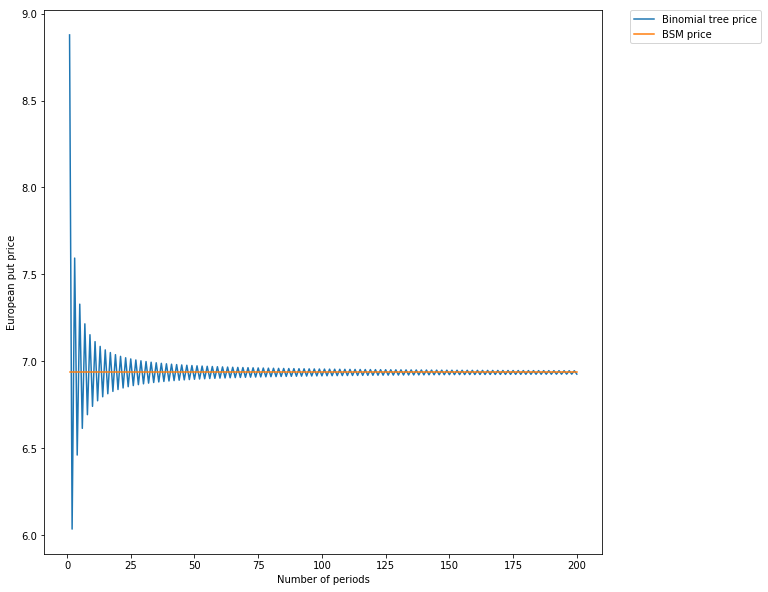

In [5]:
plt.figure(figsize=(10,10))
plt.plot(range(1,max_periods+1), puts_periods, label="Binomial tree price")
plt.plot(range(1,max_periods+1), BSM_vector, label = "BSM price")
plt.xlabel('Number of periods')
plt.ylabel('European put price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)